Cloudwalk Inc 
Risk Analyst Test

Done by Rian Rodrigues de Oliveira, January 2022

1. Analyze the data provided and present your conclusions.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
from google.colab import files
files.upload()

Saving transactional-sample.csv to transactional-sample (1).csv


{'transactional-sample.csv': b'transaction_id,merchant_id,user_id,card_number,transaction_date,transaction_amount,device_id,has_cbk\n21320398,29744,97051,434505******9116,2019-12-01T23:16:32.812632,374.56,285475,FALSE\n21320399,92895,2708,444456******4210,2019-12-01T22:45:37.873639,734.87,497105,TRUE\n21320400,47759,14777,425850******7024,2019-12-01T22:22:43.021495,760.36,,FALSE\n21320401,68657,69758,464296******3991,2019-12-01T21:59:19.797129,2556.13,,TRUE\n21320402,54075,64367,650487******6116,2019-12-01T21:30:53.347051,55.36,860232,FALSE\n21320403,59566,40759,516292******8220,2019-12-01T21:25:53.374213,60.49,192705,FALSE\n21320404,20917,25661,650485******9310,2019-12-01T21:25:19.532243,318.37,760932,FALSE\n21320405,56107,81152,650516******9201,2019-12-01T21:24:05.608374,188.68,486,TRUE\n21320406,56107,81152,650516******9201,2019-12-01T21:13:21.529999,352.77,486,TRUE\n21320407,56107,81152,650516******9201,2019-12-01T21:04:55.066909,345.68,486,TRUE\n21320408,36049,90169,470598******57

In [29]:
df = pd.read_csv('transactional-sample.csv')

In [30]:
df.head()

,transaction_id,merchant_id,user_id,card_number,transaction_date,transaction_amount,device_id,has_cbk
0,21320398,29744,97051,434505******9116,2019-12-01T23:16:32.812632,374.56,285475.0,False
1,21320399,92895,2708,444456******4210,2019-12-01T22:45:37.873639,734.87,497105.0,True
2,21320400,47759,14777,425850******7024,2019-12-01T22:22:43.021495,760.36,NaN,False
3,21320401,68657,69758,464296******3991,2019-12-01T21:59:19.797129,2556.13,NaN,True
4,21320402,54075,64367,650487******6116,2019-12-01T21:30:53.347051,55.36,860232.0,False


In [31]:
df.shape

(3199, 8)

In [32]:
df['transaction_amount'].describe()

count    3199.000000
mean      767.812904
std       889.095904
min         1.220000
25%       205.235000
50%       415.940000
75%       981.680000
max      4097.210000
Name: transaction_amount, dtype: float64

1.1 Describing the data.
The data provided contains transaction information, between the months of november and december, 2019. There are 3199 rows and 8 columns, or features. The data contains the transaction id, the merchant’s id, the user’s id, the credit or debit card number, the transaction date and time,  the amount of money in the transaction, the id of the device used, and finally a flag that marks if the user has requested chargeback of the transaction. In this dataset, 391 transactions have the chargeback flag. This constitutes approximately a 14% chargeback rate.

In [33]:
df.dtypes

transaction_id          int64
merchant_id             int64
user_id                 int64
card_number            object
transaction_date       object
transaction_amount    float64
device_id             float64
has_cbk                  bool
dtype: object

All the ids are classified as integers, as they should be. The card number is classified as an object due to the dataset saves the numbers, transforming six numbers in the middle to asterisks.  The transaction date is incorrectly classified, and we will change it to the proper format before working with it. Transaction amounts and the chargeback flag are correctly formatted.

The database has 830 null values, all in the device_id column. We decided not to remove the rows in which those values where, as it is approximately 25% of all the rows and the loss of information would be significant. Instead, we decided to fill the null values with a specific, not yet used id, 999999.

In [34]:
df.isna().sum()

transaction_id          0
merchant_id             0
user_id                 0
card_number             0
transaction_date        0
transaction_amount      0
device_id             830
has_cbk                 0
dtype: int64

In [35]:
df['device_id'].fillna("999999", inplace=True)

In [36]:
df.isna().sum()

transaction_id        0
merchant_id           0
user_id               0
card_number           0
transaction_date      0
transaction_amount    0
device_id             0
has_cbk               0
dtype: int64

In [37]:
df['transaction_date'] = pd.to_datetime(df['transaction_date'])

In [38]:
df.dtypes

transaction_id                 int64
merchant_id                    int64
user_id                        int64
card_number                   object
transaction_date      datetime64[ns]
transaction_amount           float64
device_id                     object
has_cbk                         bool
dtype: object

In [39]:
df['Dayofyear'] = df['transaction_date'].dt.dayofyear

In [41]:
df['has_cbk'].value_counts()

False    2808
True      391
Name: has_cbk, dtype: int64

In [42]:
df['month'] = df['transaction_date'].dt.to_period('M').dt.start_time

Text(0.5, 1.0, 'Chargeback by day of year')

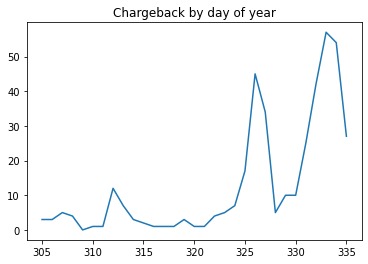

In [43]:
plt.plot(df.groupby('Dayofyear')['has_cbk'].sum())
plt.title("Chargeback by day of year")

In [44]:
df['hour'] = df['transaction_date'].dt.hour

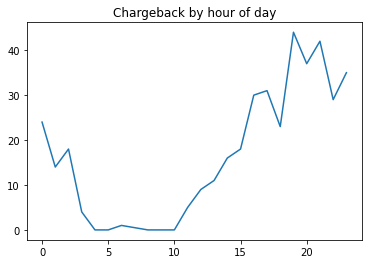

In [45]:
plt.title("Chargeback by hour of day")
plt.plot(df.groupby('hour')['has_cbk'].sum())

In [46]:
df['day'] = df['transaction_date'].dt.day

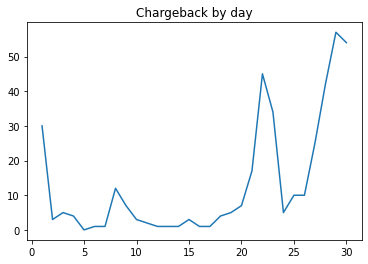

In [47]:
plt.title("Chargeback by day")
plt.plot(df.groupby('day')['has_cbk'].sum())

We will begin by using the transaction date and time to analyze the behavior of the chargeback transactions. We may be able to obtain valuable information through this analysis. First, we obtain the hour and day values of the transaction and plot the chargebacks through them. 

As we can see, the majority of transactions happened on the period from day 20 to day 24, and then in the period between days 26 to 30. The chargebacks tend to follow this trend.

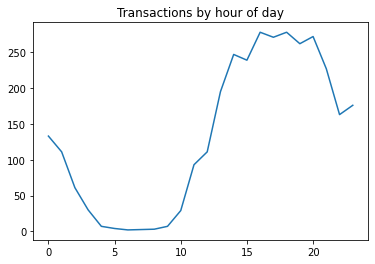

In [48]:
plt.title("Transactions by hour of day")
plt.plot(df.groupby('hour')['transaction_id'].count())

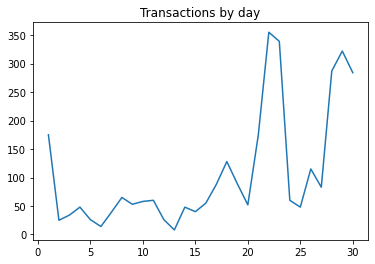

In [49]:
plt.title("Transactions by day")
plt.plot(df.groupby('day')['transaction_id'].count())

We can see that the number of transactions and chargebacks grows steadly after around 10 o’clock. 
Visually, we cannot perceive any meaningful difference between normal transactions and transactions that become chargebacks by looking at the date and hour: the amount of chargebacks rise because the number of transactions rise. 

As our attempt to identify trends through date and time was not successful, we will attempt to obtain information by performing a deep dive in each of the three parts of the transaction: the user, the merchant and the device.

With the information from the previous database, we create a new database by grouping information of the users: each row will contain the user id, the amount of transactions the user has made, the sum and mean of all his transaction amounts, and the sum and mean of the amount of chargebacks the user has requested. The mean of the chargebacks will give us a decimal number between 1 and 0, where 1 means 100% of the user’s transactions have been chargebacks. This will allow us to identify potentially problematic users in our database.

In [57]:
 user_df = df.groupby('user_id').agg({
    'transaction_id':'count',
    'transaction_amount': ['sum', 'mean'],
    'has_cbk':['sum','mean']
})

In [58]:
user_df.head()

transaction_id transaction_amount          has_cbk     
                 count                sum     mean     sum mean
user_id                                                        
6                    1             443.90   443.90       0  0.0
7                    1             359.68   359.68       0  0.0
8                    1            2416.70  2416.70       0  0.0
19                   1             165.14   165.14       0  0.0
132                  1             714.56   714.56       0  0.0

In [59]:
user_df.columns = ['_'.join(col).strip() if col[1] != "" else col[0] for col in user_df.columns.values]
user_df

,transaction_id_count,transaction_amount_sum,transaction_amount_mean,has_cbk_sum,has_cbk_mean
user_id,,,,,
6,1,443.90,443.90,0,0.0
7,1,359.68,359.68,0,0.0
8,1,2416.70,2416.70,0,0.0
19,1,165.14,165.14,0,0.0
132,1,714.56,714.56,0,0.0
...,...,...,...,...,...
99863,1,466.64,466.64,0,0.0
99875,1,191.08,191.08,0,0.0
99876,1,1421.20,1421.20,1,1.0


In [60]:
user_df.head()

,transaction_id_count,transaction_amount_sum,transaction_amount_mean,has_cbk_sum,has_cbk_mean
user_id,,,,,
6,1,443.90,443.90,0,0.0
7,1,359.68,359.68,0,0.0
8,1,2416.70,2416.70,0,0.0
19,1,165.14,165.14,0,0.0
132,1,714.56,714.56,0,0.0


In [61]:
user_df['transaction_amount_sum'].describe(percentiles=[0.05,0.25,0.95,0.975,0.99])

count     2704.000000
mean       908.370370
std       1841.260151
min          2.110000
5%          25.487000
25%        203.910000
50%        396.250000
95%       3097.612500
97.5%     3987.222250
99%       6178.346900
max      39195.130000
Name: transaction_amount_sum, dtype: float64

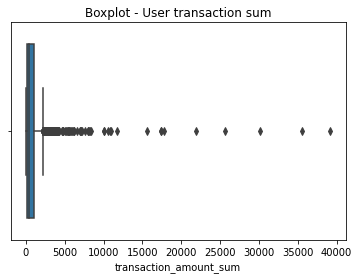

In [83]:
plt.title('Boxplot - User transaction sum')
sns.boxplot(data=user_df ,x='transaction_amount_sum')

In [79]:
user_ckb_df = user_df[user_df['has_cbk_sum']>0]

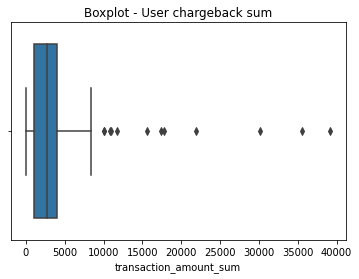

In [84]:
plt.title('Boxplot - User chargeback sum')
sns.boxplot(data=user_ckb_df ,x='transaction_amount_sum')

(array([2.655e+03, 3.500e+01, 8.000e+00, 0.000e+00, 2.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([ 0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. , 22.5, 25. ]),
 <a list of 10 Patch objects>)

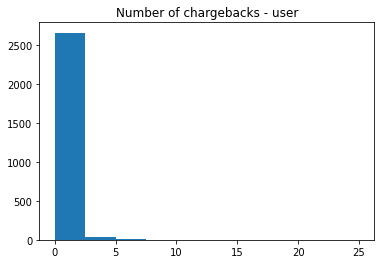

In [74]:
plt.title("Number of chargebacks - user")
plt.hist(user_df['has_cbk_sum'])

In [64]:
user_df['has_cbk_sum'].describe()

count    2704.000000
mean        0.144601
std         0.947075
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        25.000000
Name: has_cbk_sum, dtype: float64

(array([2.551e+03, 0.000e+00, 2.000e+00, 2.000e+00, 1.000e+00, 1.100e+01,
        6.000e+00, 4.000e+00, 5.000e+00, 1.220e+02]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

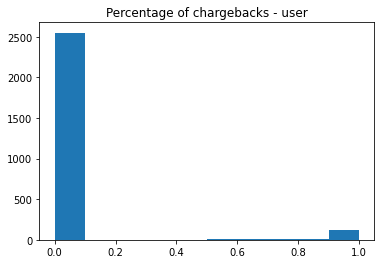

In [75]:
plt.title("Percentage of chargebacks - user")
plt.hist(user_df['has_cbk_mean'])

Most users, therefore, have very few chargeback requests, however, some users have up to 25 of these. While small in number, these users certainly have malicious intent in their chargeback requests. 


We will repeat the same process with the merchant’s information, and then compare the results to see if we gain any insight from the new data. The histograms below compare the number of chargebacks by user and by merchants.

In [66]:
merch_df = df.groupby('merchant_id').agg({
    'transaction_id':'count',
    'transaction_amount': ['sum', 'mean'],
    'has_cbk':['sum','mean']
})

In [67]:
merch_df.head()

transaction_id transaction_amount            has_cbk     
                     count                sum       mean     sum mean
merchant_id                                                          
16                       2             436.65   218.3250       0  0.0
54                       1             471.66   471.6600       0  0.0
65                       1             345.72   345.7200       0  0.0
91                       2            1519.22   759.6100       0  0.0
217                      4            7433.99  1858.4975       0  0.0

In [68]:
merch_df.columns = ['_'.join(col).strip() if col[1] != "" else col[0] for col in merch_df.columns.values]
merch_df

,transaction_id_count,transaction_amount_sum,transaction_amount_mean,has_cbk_sum,has_cbk_mean
merchant_id,,,,,
16,2,436.65,218.325000,0,0.0
54,1,471.66,471.660000,0,0.0
65,1,345.72,345.720000,0,0.0
91,2,1519.22,759.610000,0,0.0
217,4,7433.99,1858.497500,0,0.0
...,...,...,...,...,...
99653,2,259.69,129.845000,0,0.0
99679,2,16.18,8.090000,0,0.0
99711,2,3300.39,1650.195000,0,0.0


(array([1640.,    2.,    4.,    4.,    0.,   14.,    9.,    5.,   11.,
          67.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

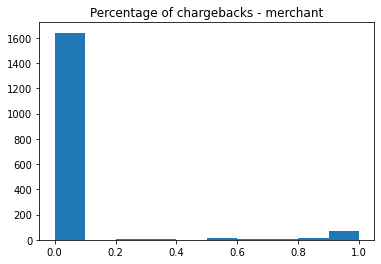

In [77]:
plt.title("Percentage of chargebacks - merchant")
plt.hist(merch_df['has_cbk_mean'])

(array([1.709e+03, 2.100e+01, 1.100e+01, 5.000e+00, 3.000e+00, 3.000e+00,
        2.000e+00, 0.000e+00, 1.000e+00, 1.000e+00]),
 array([ 0. ,  2.2,  4.4,  6.6,  8.8, 11. , 13.2, 15.4, 17.6, 19.8, 22. ]),
 <a list of 10 Patch objects>)

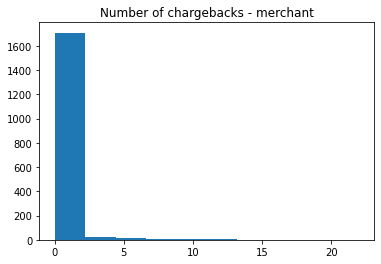

In [76]:
plt.title("Number of chargebacks - merchant")
plt.hist(merch_df['has_cbk_sum'])

The merchants have a bigger spread of chargeback requests than the users

Therefore, it can be concluded that the overwhelming majority of chargeback requests are done by users between 0 to 10% of chargeback percentages. We can safely assume that most of these users have little to no malicious intent in their requests. However, we can clearly see that there are some malicious users with a percentage of chargebacks over fifty percent, a portion of which has between  90 to 100% of their transactions having chargeback requests. It would not be a bad idea to deny a transaction request of any user that surpasses a 10% chargeback rate.

Similarly, the majority of merchants have between 0 to 10% of a chargeback rate, but there is a small group with rates of 50% and more. There is a possibility these merchants commit an above average rate of error, engage in misleading and false advertising, and/or deny any refund request done by users. It would be prudent to deny transactions to these merchants aswell.


We should now analyse the transaction outliers, compare them to the chargeback outliers, and see if we can obtain any insight or additional information based on this analysis. It stands to reason that a friedly or criminal fraud would tend to be on the higher price tag, and we would like to verify if that’s the case.

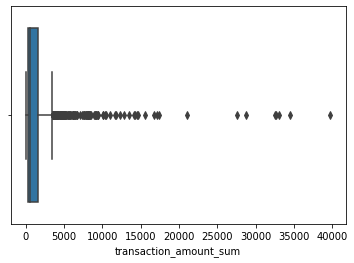

In [70]:
sns.boxplot(data=merch_df ,x='transaction_amount_sum')

From this, we can infer that the chargebacks do, in fact, have a higher amount of money transactioned than the overall data. It may be due to malicious intent, such as criminal or friendly fraud, or it may simply be because clients would be more demanding of those purchases with higher prices.

In conclusion, we have identified that the majority of chargeback cases are not malicious in nature. The chargebacks over the days and hours follows the transactions: there is no significant day, nor significant hour in which chargebacks are much more likely to occur. The majority of users request a chargeback around 10% of the time or less, although there is a visible group of users that are malicious in nature, with almost 100% chargeback rate. As such, while we would benefit from protecting ourselves from criminal and friendly fraud, it would be more beneficial to dedicate resources to reducing the charback rates of those clients who request them sparingly, for that is the greater mass.